<a href="https://colab.research.google.com/github/Howl06/teams_project_classify/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.98 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from ultralytics import YOLO

# 訓練
# Load a model
# model = YOLO('yolov8M.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
# model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
model.train(data='/content/drive/MyDrive/yolov8/dataset/data.yaml', project="/content/drive/MyDrive/yolov8/result", batch=16, epochs=200, imgsz=640)

# Predict with the model
model.export(format='torchscript')

100%|██████████| 6.23M/6.23M [00:00<00:00, 80.9MB/s]
Ultralytics YOLOv8.0.80 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/yolov8/dataset/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8/result, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, re

'/content/drive/MyDrive/yolov8/result/train5/weights/best.torchscript'

In [ ]:
from ultralytics import YOLO

# 驗證
# Load a model
# model = YOLO('yolov8n.pt')  # load an official model
model = YOLO('/content/drive/MyDrive/yolov8/result/train5/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category


Ultralytics YOLOv8.0.78 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs
100%|██████████| 755k/755k [00:00<00:00, 19.8MB/s]
val: Scanning /content/drive/MyDrive/yolov8/dataset/valid/labels.cache... 89 images, 0 backgrounds, 0 corrupt: 100%|██████████| 89/89 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/yolov8/dataset/valid/images/20230414_033009_mov-149_jpg.rf.aad087298b8add0c0ed18484b73cf77e.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:12<00:00,  2.07s/it]
                   all         89        331      0.725      0.566      0.602      0.295
             Black_rot         89         53      0.579      0.377      0.369      0.199
           Anthracnose         89        278      0.871      0.755      0.836      0.391
Speed: 3.6ms preprocess, 38.8ms inference, 0.0ms loss, 5.1ms pos

array([    0.19889,     0.39064])


0: 640x640 1 Anthracnose, 63.0ms
Speed: 10.9ms preprocess, 63.0ms inference, 19.9ms postprocess per image at shape (1, 3, 640, 640)


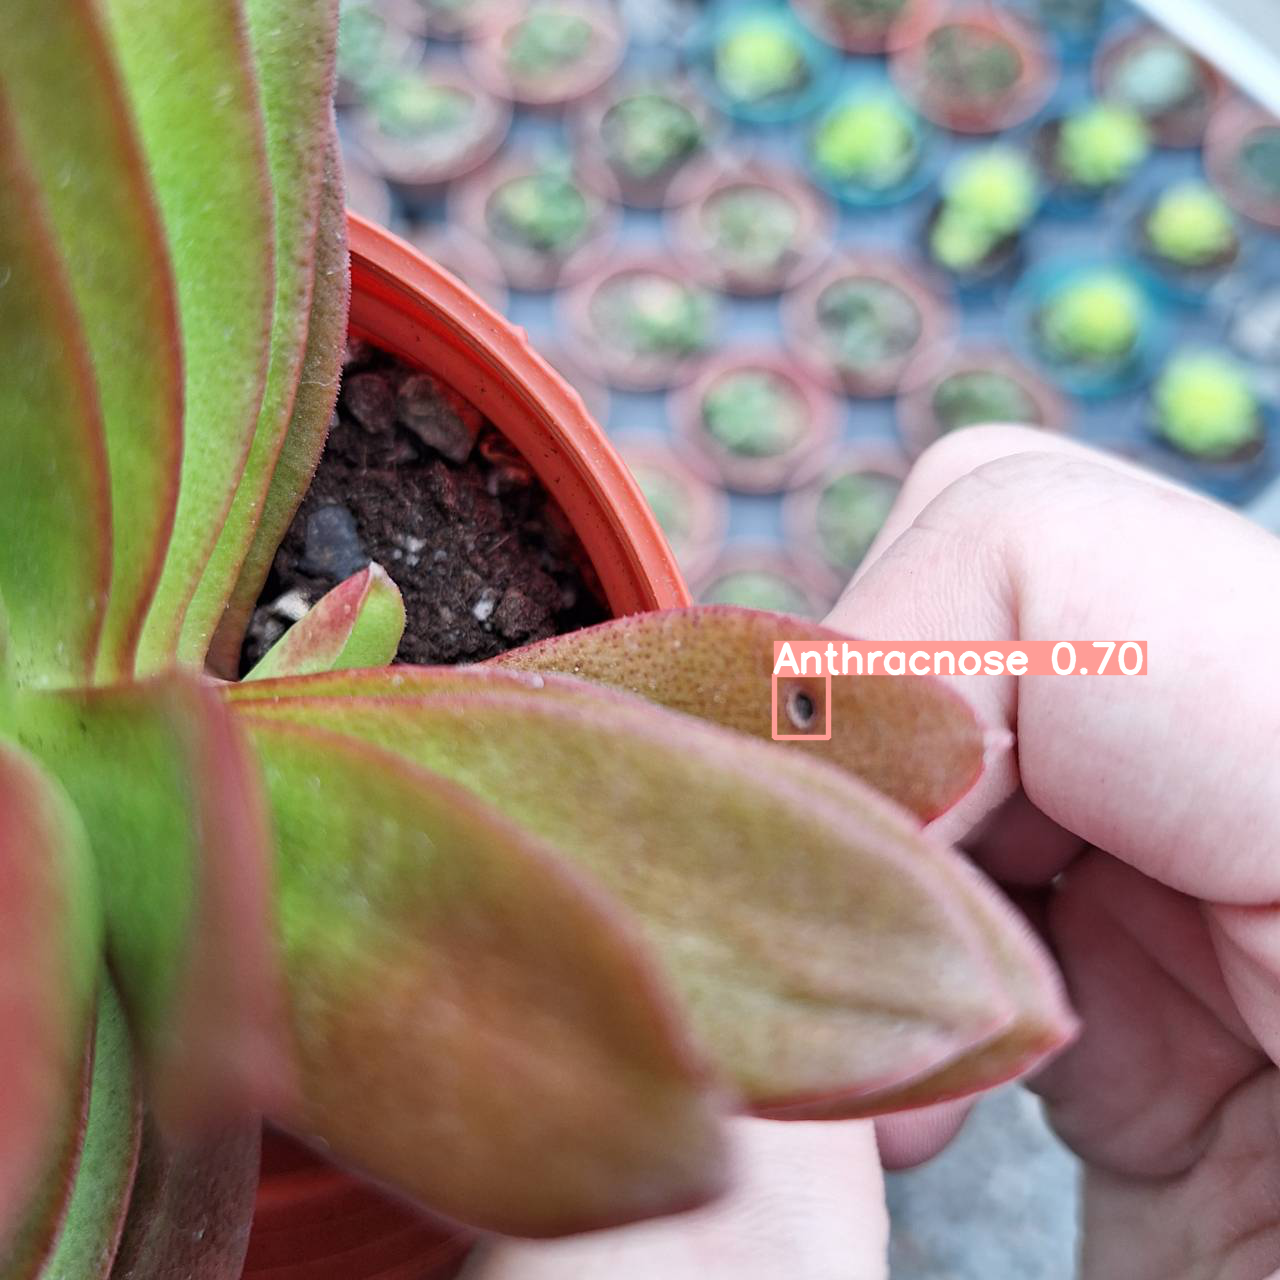

In [5]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2
from PIL import Image

# 訓練
# Load a model
model = YOLO("/content/drive/MyDrive/yolov8/result/train5_yolov8l/weights/best.pt")
img = Image.open("/content/drive/MyDrive/yolov8/7666.jpg")
results = model.predict(img,
            project="/content/runs",
            imgsz=640,
            conf=0.5)  # predict on an image
# with open('/content/drive/MyDrive/yolov8/prediction.jpg', 'wb') as f:
#     f.write(results.)


res_plotted = results[0].plot()
cv2_imshow(res_plotted[:,:,:])
# cv2.imwrite('/content/預測.jpg', res_plotted, [cv2.IMWRITE_JPEG_QUALITY, 80])

In [ ]:
import torch
boxes = results[0].boxes # boxes info
boxes.cls # boxe's class
boxes.conf # boxe's Confidence score
results[0].names # class nane
print(float(boxes.conf.cpu()[0])) # Confidence score of the first box 
print(type(results[0].names)) 
print(results[0].names)
print(type(boxes.cls))
print(boxes.cls)
print(results[0].names[int(torch.unique(boxes.cls))])

0.8949267268180847
<class 'dict'>
{0: 'Black_rot', 1: 'Anthracnose'}
<class 'torch.Tensor'>
tensor([1., 1., 1., 1.], device='cuda:0')
Anthracnose


from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2

# 訓練
# Load a model
model = YOLO("/content/drive/MyDrive/yolov8/result/train5/weights/best.pt")

results = model.predict("/content/13620045_492526170942543_1047386906716004297_n.jpg",
            project="/content/runs",
            save=True, # save images with results
            save_txt=True, # save results as .txt file
            save_conf=True, # txt row_info + confidence scores
            imgsz=640,
            max_det=1, # maximum number of detections per image
            conf=0.5)  # predict on an image
# with open('/content/drive/MyDrive/yolov8/prediction.jpg', 'wb') as f:
#     f.write(results.)


res_plotted = results[0].plot()
cv2_imshow(res_plotted)
# cv2.imwrite('/content/預測.jpg', res_plotted, [cv2.IMWRITE_JPEG_QUALITY, 80])

In [ ]:
!python --version

Python 3.10.11
